In [1]:
import tensorflow as tf
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

from model import Rewrite, RewriteGenerator, RewriteLoss, RewriteModelSaveCheckpoint

%matplotlib inline

print(tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Keras version", tf.keras.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

2.9.1
Eager mode:  True
Keras version 2.9.0
GPU is available


# 辅助函数
# helper functions

In [2]:
def drawing_train_history(model_name, loss):
    plt.figure(figsize=(10, 16))
    plt.rcParams['figure.figsize'] = [16, 9]
    plt.rcParams['font.size'] = 14
    plt.rcParams['axes.grid'] = True
    plt.rcParams['figure.facecolor'] = 'white'
    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Generator Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.title(f'{model_name}')
    plt.xlabel('epoch')
    plt.tight_layout(pad=3.0)

# 训练
# Training

In [3]:
batch_size = 16
learning_rate = 0.0001
epochs = 1000
char_size = 80

In [4]:
gen = RewriteGenerator(char_size=char_size,
                       batch_size=batch_size,
                       images_path='datasets/images')

2933 images found in datasets/images


In [5]:
model = Rewrite(char_size=char_size)
model.compile(loss=RewriteLoss(char_size=char_size), optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate, amsgrad=True))
if os.path.exists('rewrite.h5'):
    model.load_weights('rewrite.h5')

In [6]:
history = model.fit(gen,
                    epochs=epochs,
                    callbacks=[
                        tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.90, patience=2, mode='min'),
                        tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights=True, mode='min', verbose=1),
                        RewriteModelSaveCheckpoint(),
                    ])

Epoch 1/1000
183/183 [==============================] - 85s 330ms/step - loss: 0.3656 - lr: 1.0000e-04
Epoch 2/1000
183/183 [==============================] - 61s 333ms/step - loss: 0.3656 - lr: 1.0000e-04
Epoch 3/1000
183/183 [==============================] - 60s 329ms/step - loss: 0.3655 - lr: 1.0000e-04
Epoch 4/1000
183/183 [==============================] - 60s 330ms/step - loss: 0.3652 - lr: 9.0000e-05
Epoch 5/1000
183/183 [==============================] - 64s 349ms/step - loss: 0.3651 - lr: 9.0000e-05
Epoch 6/1000
183/183 [==============================] - 60s 327ms/step - loss: 0.3650 - lr: 9.0000e-05
Epoch 7/1000
183/183 [==============================] - 60s 330ms/step - loss: 0.3649 - lr: 9.0000e-05
Epoch 8/1000
183/183 [==============================] - 61s 333ms/step - loss: 0.3649 - lr: 9.0000e-05
Epoch 9/1000
183/183 [==============================] - 61s 333ms/step - loss: 0.3647 - lr: 8.1000e-05
Epoch 10/1000
183/183 [==============================] - 61s 331ms/step -

Epoch 80/1000
183/183 [==============================] - 61s 333ms/step - loss: 0.3614 - lr: 1.2158e-05
Epoch 81/1000
183/183 [==============================] - 61s 333ms/step - loss: 0.3614 - lr: 1.2158e-05
Epoch 82/1000
183/183 [==============================] - 61s 332ms/step - loss: 0.3614 - lr: 1.2158e-05
Epoch 83/1000
183/183 [==============================] - 61s 335ms/step - loss: 0.3614 - lr: 1.0942e-05
Epoch 83: early stopping


## 绘制训练损失
## Plotting the training loss

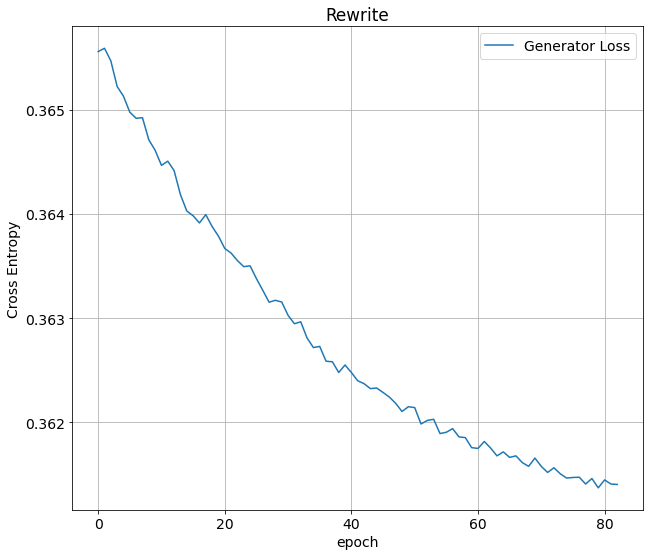

In [7]:
loss = history.history['loss']
drawing_train_history('Rewrite', loss)

## 保存模型
## Saving the model

In [8]:
model.save_weights('rewrite.h5')